<a href="https://colab.research.google.com/github/sammig6i/kaparthy-makemore-tuts/blob/main/makemore_part1/makemore_part1_E01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
words = open("/content/names (1).txt", 'r').read().splitlines()

In [4]:
len(words)

32033

In [5]:
chars = ["."] + sorted(list(set("".join(words))))
stoi = {s:i for i, s in enumerate(chars)}
sstoi = {(s1, s2):i for i, (s1, s2) in enumerate([(s1, s2) for s1 in chars for s2 in chars])}
stoi["."] = 0
itos = {i:s for s, i in stoi.items()}
itoss = {i:(s1, s2) for (s1, s2), i in sstoi.items()}

In [6]:
xs, ys = [], []
for w in words:
  chs = ["."] + list(w) + ["."]
  for (ch1, ch2), ch3 in zip(zip(chs, chs[1:]), chs[2:]):
    ix1 = sstoi[(ch1, ch2)]
    ix2 = stoi[ch3]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('Number of examples: ', num)
print(f'xs size: {xs.shape}')
print(f'ys size: {ys.shape}')


Number of examples:  196113
xs size: torch.Size([196113])
ys size: torch.Size([196113])


In [7]:
for i in range(10):
  print(f"{itoss[xs[i].item()]} -> {itos[ys[i].item()]}")
  print(f"{xs[i]} -> {ys[i]}")

('.', 'e') -> m
5 -> 13
('e', 'm') -> m
148 -> 13
('m', 'm') -> a
364 -> 1
('m', 'a') -> .
352 -> 0
('.', 'o') -> l
15 -> 12
('o', 'l') -> i
417 -> 9
('l', 'i') -> v
333 -> 22
('i', 'v') -> i
265 -> 9
('v', 'i') -> a
603 -> 1
('i', 'a') -> .
244 -> 0


In [8]:
# init a 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(itoss),27), generator=g, requires_grad=True)

In [13]:
batches = torch.arange(0, 100, 1)
losses = []

xenc = F.one_hot(xs, num_classes=len(itoss)).float()

for _ in batches:

  # forward pass
  logits = xenc @ W
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdim=True)
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  losses.append(loss.item())

  # backward pass
  W.grad = None
  loss.backward()


  # update
  W.data += -50 * W.grad

  print(f'Batch: {len(losses)}: loss = {loss.item()}')




Batch: 1: loss = 2.4096977710723877
Batch: 2: loss = 2.4073662757873535
Batch: 3: loss = 2.4050686359405518
Batch: 4: loss = 2.4028050899505615
Batch: 5: loss = 2.400573253631592
Batch: 6: loss = 2.398374080657959
Batch: 7: loss = 2.3962056636810303
Batch: 8: loss = 2.3940680027008057
Batch: 9: loss = 2.391960382461548
Batch: 10: loss = 2.3898820877075195
Batch: 11: loss = 2.3878326416015625
Batch: 12: loss = 2.3858108520507812
Batch: 13: loss = 2.383816957473755
Batch: 14: loss = 2.381850004196167
Batch: 15: loss = 2.3799095153808594
Batch: 16: loss = 2.3779945373535156
Batch: 17: loss = 2.376105546951294
Batch: 18: loss = 2.3742411136627197
Batch: 19: loss = 2.372401237487793
Batch: 20: loss = 2.3705854415893555
Batch: 21: loss = 2.368792772293091
Batch: 22: loss = 2.367023468017578
Batch: 23: loss = 2.365276575088501
Batch: 24: loss = 2.3635518550872803
Batch: 25: loss = 2.3618485927581787
Batch: 26: loss = 2.3601672649383545
Batch: 27: loss = 2.358506441116333
Batch: 28: loss = 2.3

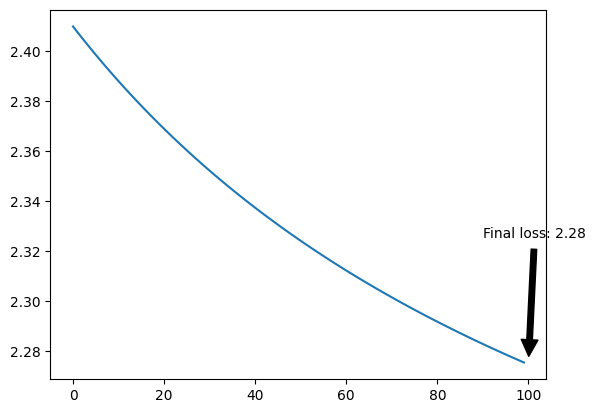

In [27]:
plt.plot(losses)
        # Annotate plot wit final loss value
plt.annotate(
    text=f"Final loss: {round(losses[-1], 2)}",
    xy=(len(losses), losses[-1]),
    xytext=(len(losses) - 10, losses[-1] + 0.05),
    arrowprops=dict(facecolor="black", shrink=0.05),
)
plt.savefig("/content/nn_trigram_loss")
plt.show()